Importing & Inspecting Data


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [74]:
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None)

data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']


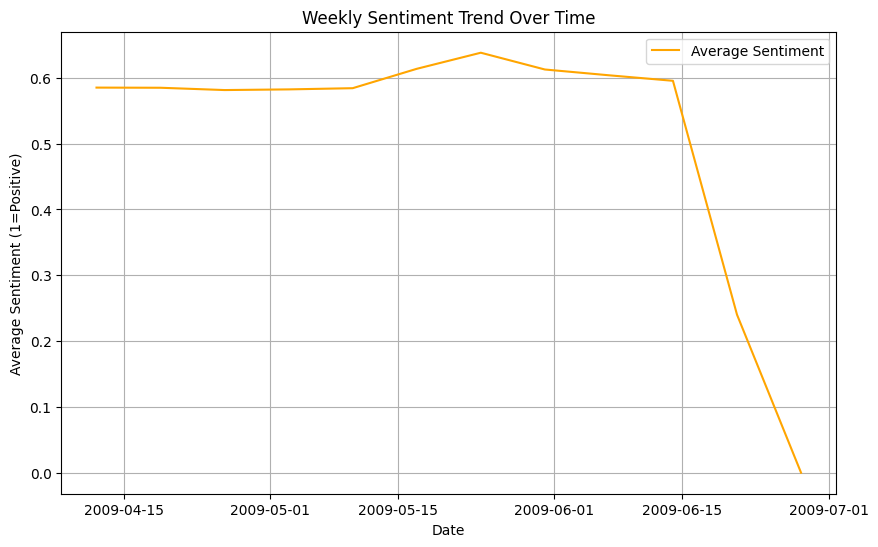

In [75]:
data['date'] = pd.to_datetime(data['date'].astype(str).str.replace(r' [A-Z]{3}', '', regex=True))

data['sentiment'] = data['target'].replace({4: 1})

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data['sentiment_num'] = data['sentiment']

weekly_sentiment = data['sentiment_num'].resample('W').mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(weekly_sentiment.index, weekly_sentiment.values, color='orange', label='Average Sentiment')
plt.title('Weekly Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (1=Positive)')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
data = data[['text', 'target']]
data['target'] = data['target'].apply(lambda x: 1 if x == 4 else 0)

data.head()

,text,target
date,,
2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,0
2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,0
2009-04-06 22:19:57,my whole body feels itchy and like its on fire,0
2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",0


Exploring Data

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1600000 entries, 2009-04-06 22:19:45 to 2009-06-16 08:40:50
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [78]:
data.describe()

,target
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


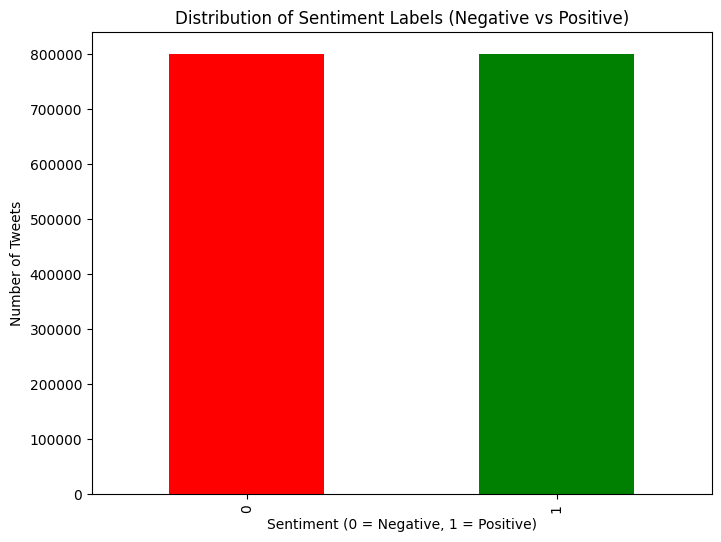

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
data['target'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Distribution of Sentiment Labels (Negative vs Positive)")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Tweets")
plt.show()


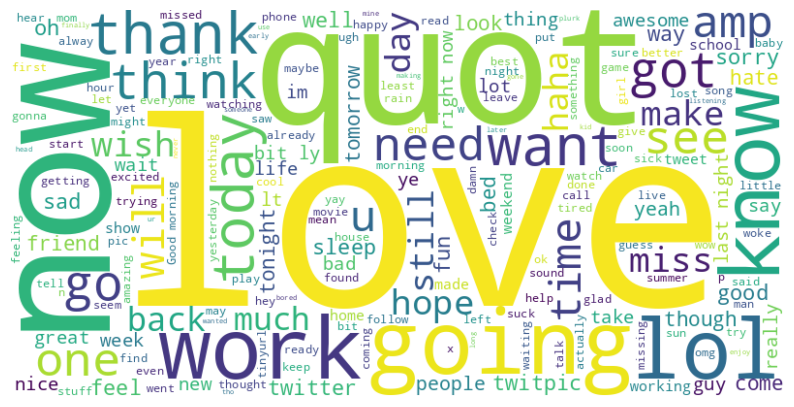

In [80]:
from wordcloud import WordCloud

all_words = " ".join(data['text'])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [81]:
print("Negative Tweets:")
print(data[data['target'] == 0].head())

print("Positive Tweets:")
print(data[data['target'] == 1].head())


Negative Tweets:
                                                                  text  target
date                                                                          
2009-04-06 22:19:45  @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
2009-04-06 22:19:49  is upset that he can't update his Facebook by ...       0
2009-04-06 22:19:53  @Kenichan I dived many times for the ball. Man...       0
2009-04-06 22:19:57    my whole body feels itchy and like its on fire        0
2009-04-06 22:19:57  @nationwideclass no, it's not behaving at all....       0
Positive Tweets:
                                                                  text  target
date                                                                          
2009-04-06 22:22:45       I LOVE @Health4UandPets u guys r the best!!        1
2009-04-06 22:22:45  im meeting up with one of my besties tonight! ...       1
2009-04-06 22:22:46  @DaRealSunisaKim Thanks for the Twitter add, S...       1
2009-04-06 22:22:4

Pre_processing Data

In [82]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [84]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(clean_text)

data[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
date,,
2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
2009-04-06 22:19:57,my whole body feels itchy and like its on fire,whole body feel itchy like fire
2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=2000)

X = vectorizer.fit_transform(data['clean_text'])

y = data['target']

print(X.shape)

(1600000, 2000)


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training & Building (Naive Bayes)

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

Model Prediction

In [88]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [89]:
y_test

,target
date,
2009-06-16 18:18:12,0
2009-04-06 23:11:14,0
2009-06-23 13:40:11,0
2009-06-01 10:26:07,0
2009-06-20 12:56:51,0
...,...
2009-04-19 11:10:34,1
2009-05-22 07:45:59,1
2009-06-05 10:22:51,1


In [90]:
y_test.values

array([0, 0, 0, ..., 1, 1, 0])

Model Evaluation

In [91]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7497125

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75    159494
           1       0.76      0.74      0.75    160506

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000

Confusion Matrix:
[[121791  37703]
 [ 42389 118117]]


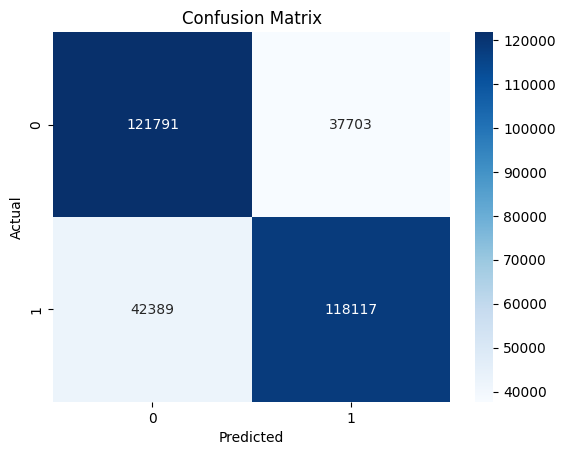

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Model Training & Building (Logistic Regression)

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.76206875
              precision    recall  f1-score   support

           0       0.78      0.72      0.75    159494
           1       0.74      0.80      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



Model Training & Building (Support Vector Machine)

In [94]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.761734375
              precision    recall  f1-score   support

           0       0.79      0.72      0.75    159494
           1       0.74      0.81      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

